# Reading data
with the **read_csv_url()** function wrote by *Chris*

the function of read_csv_url() is:
*   Load a CSV file from a remote URL into a pandas DataFrame
*   Clean column names using janitor(if loading fails, prints a failure message)

In [11]:
import pandas as pd

In [12]:
import requests
import pandas as pd
from io import BytesIO
import gzip

url = "https://orca.casa.ucl.ac.uk/~jreades/data/20250615-London-listings.csv.gz"

# Fetch the file with requests (handles SSL correctly)
response = requests.get(url)
response.raise_for_status()  # will raise an error if download fails

# Open the gzip file in memory
with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
    df = pd.read_csv(f)

print(f"The data is {df.shape[0]} rows * {df.shape[1]} columns")

The data is 96651 rows * 79 columns


# Selecting the columns we want

In [13]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96651 non-null  int64  
 1   listing_url                                   96651 non-null  object 
 2   scrape_id                                     96651 non-null  int64  
 3   last_scraped                                  96651 non-null  object 
 4   source                                        96651 non-null  object 
 5   name                                          96651 non-null  object 
 6   description                                   93806 non-null  object 
 7   neighborhood_overview                         41983 non-null  object 
 8   picture_url                                   96642 non-null  object 
 9   host_id                                       96651 non-null 

In [14]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 
    'description', 'host_id', 'host_name', 'host_since', 
    'host_location', 'host_about', 'host_is_superhost', 
    'host_listings_count', 'host_total_listings_count', 
    'host_verifications', 'latitude', 'longitude', 
    'property_type', 'room_type', 'accommodates', 
    'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
    'amenities', 'price', 'minimum_nights', 'maximum_nights', 
    'availability_365', 'number_of_reviews', 
    'first_review', 'last_review', 'review_scores_rating', 
    'license', 'reviews_per_month']
df = df[cols]

# Set to show ALL columns without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Prevent line wrapping

print(f"Cols contains {len(cols)} columns.")
df.sample(5, random_state = 1)

Cols contains 34 columns.


,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
88047,1371159657488873429,https://www.airbnb.com/rooms/1371159657488873429,2025-06-13,Bespoke 2 bed 2bath apartment in South Kensington,Enjoy this centrally-located flatof 2 bed 2 ba...,681589009,Vasile,2025-02-28,NaN,NaN,f,11.0,11.0,"['email', 'phone']",51.493550,-0.184780,Entire rental unit,Entire home/apt,5,2.0,2 baths,2.0,2.0,"[""Cooking basics"", ""Washer"", ""Wine glasses"", ""...",$416.00,5,365,49,0,NaN,NaN,NaN,NaN,NaN
10924,14559403,https://www.airbnb.com/rooms/14559403,2025-06-13,"Bright, Fresh & Modern Ensuite Room","Perfect for business travellers, solo adventur...",61939174,Melody,2016-03-07,"London, United Kingdom",My husband and I are working professionals in ...,f,1.0,2.0,"['email', 'phone']",51.493270,-0.324240,Private room in home,Private room,2,NaN,1 private bath,1.0,NaN,"[""Lockbox"", ""Self check-in"", ""Iron"", ""Hair dry...",NaN,1,40,0,178,2016-09-28,2020-03-15,4.94,NaN,1.68
48134,810774383603868550,https://www.airbnb.com/rooms/810774383603868550,2025-06-11,3 Bedroom Family Friendly home in East London,Welcome to our three bedroom family home!<br /...,371048030,Kate,2020-10-07,"England, United Kingdom",East London Family,f,1.0,1.0,"['email', 'phone']",51.568946,-0.022849,Entire home,Entire home/apt,6,2.5,2.5 baths,3.0,3.0,"[""Cooking basics"", ""Washer"", ""Wine glasses"", ""...",$160.00,2,14,19,12,2023-03-12,2023-09-24,4.83,NaN,0.44
65676,1109998846922231362,https://www.airbnb.com/rooms/1109998846922231362,2025-06-14,Peaceful Garden View Apt. close to Central London,Welcome to our clean and cosy flat nestled in ...,228031450,Aditya,2018-11-28,"London, United Kingdom","Design, entrepreneurship, living fully, exerci...",f,1.0,1.0,"['email', 'phone']",51.503374,-0.283565,Entire condo,Entire home/apt,4,NaN,1 bath,1.0,NaN,"[""Cooking basics"", ""Washer"", ""Wine glasses"", ""...",NaN,1,12,30,5,2024-04-16,2024-10-03,4.60,NaN,0.35
62478,1059430992167095579,https://www.airbnb.com/rooms/1059430992167095579,2025-06-12,Room in artists flat in Hackney,Guest room in an artist's' flat in South Hackn...,20110902,Leah,2014-08-16,"London, United Kingdom","Artist living in Hackney, London",t,1.0,1.0,"['email', 'phone']",51.537340,-0.052940,Private room in condo,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",$67.00,2,14,187,55,2024-04-21,2025-06-01,4.91,NaN,3.95


# Counting nulls

### Counting Nulls by Column

In [15]:
df.isnull().sum(axis=0).sort_values(ascending=False)

license                      96651
host_about                   47337
beds                         33975
price                        33967
bathrooms                    33921
first_review                 25164
reviews_per_month            25164
last_review                  25164
review_scores_rating         25164
host_location                23328
bedrooms                     12580
description                   2845
host_is_superhost             1823
bathrooms_text                 149
host_name                       40
host_since                      38
host_total_listings_count       38
host_verifications              38
host_listings_count             38
number_of_reviews                0
availability_365                 0
maximum_nights                   0
minimum_nights                   0
id                               0
amenities                        0
accommodates                     0
listing_url                      0
property_type                    0
longitude           

In [16]:
# drop the columns which contain too many nans
df.drop(columns=['license','host_about'], inplace=True)

## Counting Nulls by Row

In [17]:
print(f"There are {df.shape[1]} Columns in total!")
df.isnull().sum(axis=1).sort_values(ascending=False)

There are 32 Columns in total!


3646     14
5155     14
5535     14
4622     14
6122     14
         ..
50887     0
50888     0
50893     0
50897     0
48325     0
Length: 96651, dtype: int64

<class 'pandas.core.series.Series'>


<Axes: ylabel='Frequency'>

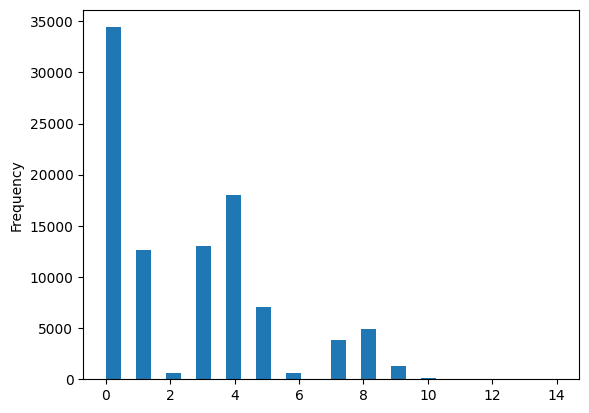

In [18]:
probs = df.isnull().sum(axis=1)
print(type(probs))       
probs.plot.hist(bins=30) 

In [19]:
# drop rows with more than 5 nans
print(f"df contains {df.shape[0]:,} rows.")
cutoff = 5
df.drop(probs[probs > cutoff].index, inplace=True)
print(f"df contains {df.shape[0]:,} rows.")

df contains 96,651 rows.
df contains 85,816 rows.


set the path to store the raw data

In [20]:
from pathlib import Path
import numpy as np
import pandas as pd

In [21]:
path = Path(f'01_Data/Raw/{Path(url).name}').mkdir(parents=True, exist_ok=True) 
print(f"Writing to: {path}")

Writing to: None


# Fix data type

In [22]:
# boolean type data
bools = ['host_is_superhost']
for b in bools:
    print(f"Converting {b}")
    df[b] = df[b].replace({'f':False, 't':True}).astype('bool')

Converting host_is_superhost


In [23]:
# date type data
dates = ['last_scraped','host_since','first_review','last_review']

print(f"Currently {dates[1]} is of type '{df[dates[1]].dtype}'", "\n")
df.sample(5, random_state=43)[dates]

Currently host_since is of type 'object' 



,last_scraped,host_since,first_review,last_review
73503,2025-06-12,2016-11-29,2024-10-20,2025-05-05
30837,2025-06-13,2011-05-11,2019-12-01,2020-03-08
50741,2025-06-12,2017-11-17,2023-05-13,2023-12-30
46926,2025-06-12,2021-07-30,2023-02-27,2025-05-25
37637,2025-06-13,2018-06-07,NaN,NaN


In [24]:
for d in dates:
    print("Converting " + d)
    df[d] = pd.to_datetime(df[d])

Converting last_scraped
Converting host_since
Converting first_review
Converting last_review


In [25]:
# categories type
cats = ['property_type','room_type']

print(f"Currently {cats[1]} is of type '{df[cats[1]].dtype}'", "\n")
df.sample(5, random_state=42)[cats]

Currently room_type is of type 'object' 



,property_type,room_type
61872,Entire home,Entire home/apt
3813,Private room in home,Private room
17706,Entire home,Entire home/apt
63429,Private room in rental unit,Private room
73215,Entire home,Entire home/apt


In [26]:
df[cats[0]].value_counts()

property_type
Entire rental unit             37143
Private room in rental unit    11610
Private room in home           10121
Entire condo                    8113
Entire home                     7848
                               ...  
Private room in treehouse          1
Minsu                              1
Religious building                 1
Room in rental unit                1
Shared room in loft                1
Name: count, Length: 88, dtype: int64

In [27]:
df[cats[1]].value_counts()

room_type
Entire home/apt    57168
Private room       28367
Shared room          180
Hotel room           101
Name: count, dtype: int64

In [28]:
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')

Converting property_type
Converting room_type


In [29]:
# strings type
money = ['price']
df.sample(5, random_state=42)[money]

,price
61872,NaN
3813,$43.00
17706,NaN
63429,$65.00
73215,NaN


In [30]:
for m in money:
    print(f"Converting {m}")
    try:
        # Ensure values are treated as strings before cleaning
        df[m] = (
            df[m].astype(str)                           # force to string
                 .str.replace("$", "", regex=False)     # remove dollar signs
                 .str.replace(",", "", regex=False)     # remove commas
                 .astype(float)                         # convert to float
        )
    except (ValueError, AttributeError) as e:
        print(f"    xxxx Unable to convert {m} to float xxxx")
        print(e)

Converting price


In [31]:
df.sort_values(by='price', ascending=False).head(5)[['id','name','price','minimum_nights']]

,id,name,price,minimum_nights
10262,13841484,Bright & airy DoubleBed with EnSuite in Zone 2!,74100.0,2
56678,957005187369596707,Close To London Eye,65000.0,2
82485,1311151886101957046,Walk To London Eye,58000.0,2
84270,1334032580590137938,Amazing Central Location (NBOL),58000.0,2
59371,1009450636308513568,Close to London Eye (BOL),58000.0,2


In [32]:
# int type
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates',
         'beds','minimum_nights','maximum_nights','availability_365']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("  - !!!Converting to unsigned 16-bit integer!!!")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_listings_count
Converting host_total_listings_count
Converting accommodates
Converting beds
  - !!!Converting to unsigned 16-bit integer!!!
Converting minimum_nights
Converting maximum_nights
Converting availability_365


In [33]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 85816 entries, 0 to 96650
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         85816 non-null  int64         
 1   listing_url                85816 non-null  object        
 2   last_scraped               85816 non-null  datetime64[ns]
 3   name                       85816 non-null  object        
 4   description                84147 non-null  object        
 5   host_id                    85816 non-null  int64         
 6   host_name                  85814 non-null  object        
 7   host_since                 85816 non-null  datetime64[ns]
 8   host_location              65657 non-null  object        
 9   host_is_superhost          85816 non-null  bool          
 10  host_listings_count        85816 non-null  int64         
 11  host_total_listings_count  85816 non-null  int64         
 12  host_veri

Have a look...

In [34]:
df.reset_index(drop=True, inplace=True)

# Saving

In [40]:
from pathlib import Path
import pandas as pd

# Define output paths
csv_out = Path("01_Data/Cleaned/listings.csv")
pq_out  = Path("01_Data/Cleaned/listings.parquet")
csv_out.parent.mkdir(parents=True, exist_ok=True)

# Save CSV
df.to_csv(csv_out, index=False, encoding="utf-8")

# Save Parquet using fastparquet
df.to_parquet(pq_out, engine="fastparquet", index=False)

print(f"Saved {df.shape[0]:,} rows of {df.shape[1]:,} columns to {csv_out.resolve()}")
print("Done.")


Saved 85,816 rows of 32 columns to /Users/christianmulder/Desktop/CASA/FSDS_Groupwork/01_Data/Cleaned/listings.csv
Done.


In [41]:
df_cleaned = pd.read_csv("01_Data/Cleaned/listings.csv")
df_cleaned.sample(5, random_state = 1)

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month
64383,1213133182694283264,https://www.airbnb.com/rooms/1213133182694283253,2025-06-11,"Luxury Flat, 2 min walk from O2",Luxury Apartment - 2 minute walk from the 02 A...,580193341,Ashanti,2024-05-28,"London, United Kingdom",False,3,3,['phone'],51.501334,0.00695,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Washer"", ""Smoke alarm"", ""Paid parking lot of...",225.0,1,365,309,7,2024-08-18,2024-09-17,4.71,0.70
54538,1074352305172927104,https://www.airbnb.com/rooms/1074352305172927050,2025-06-12,"1-Bedroom Flat with Balcony, near Tower of London",This apartment has everything you need to live...,557379201,Minna,2024-01-19,"London, United Kingdom",True,4,4,['phone'],51.511167,-0.07111,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Washer"", ""Self check-in"", ...",187.0,1,365,30,7,2024-03-26,2025-05-31,4.71,0.47
39315,781997691837253248,https://www.airbnb.com/rooms/781997691837253275,2025-06-11,Уютная Комната в аренду в центре Лондона,Located in central London. You will be able to...,263270611,Таня,2019-05-21,"England, United Kingdom",False,3,4,"['email', 'phone']",51.460660,-0.06040,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Wine glasses"", ""Iron"", ""Smoke alarm"", ""First...",45.0,1,365,67,12,2023-03-04,2023-06-14,5.00,0.43
35134,671662210364514176,https://www.airbnb.com/rooms/671662210364514167,2025-06-14,Spacious Studio Apartment in Zone 1 near Holborn,Our lovely quiet private student accommodation...,446421145,Dan,2022-02-22,NaN,False,39,39,"['email', 'phone']",51.519300,-0.10653,Entire serviced apartment,Entire home/apt,2,NaN,1.5 baths,1.0,NaN,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",NaN,3,365,0,13,2022-07-31,2025-05-01,4.38,0.37
2456,4412945,https://www.airbnb.com/rooms/4412945,2025-06-13,Central Beautiful Quiet Light 1-Bed,"Centrally located in Clerkenwell, in an area w...",17440224,Sylvia,2014-06-30,"San Francisco, CA",False,1,3,"['email', 'phone']",51.523350,-0.10152,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""Washer"", ""Smoke alarm"", ""Heating"", ""Elevator...",NaN,3,1125,0,17,2015-01-03,2016-08-29,4.35,0.13


In [ ]:
import os
print("Current working directory:", os.getcwd())
print("CSV absolute path:", csv_out.resolve())
print("CSV exists?", csv_out.exists())


Current working directory: c:\Users\chris\CASA\FSDS_Groupwork
CSV absolute path: C:\Users\chris\CASA\FSDS_Groupwork\01_Data\Cleaned\listings.csv
CSV exists? True
